<a href="https://colab.research.google.com/github/Pulsar-kkaturi/Deepnoid-Education/blob/master/Lecture14_CAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 14. CAE

# 1. Library Import

라이브러리를 불러옵니다.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

# 2. Dataset Load

MNIST데이터 셋을 불러옵니다.

In [10]:
(X_train, _), (X_test, _) = mnist.load_data()

train_size = 1000  # X_train.shape[0]
test_size = 500  # X_test.shape[0]

X_train = X_train[:train_size].reshape(train_size, 28, 28, 1).astype('float32') / 255  
X_test = X_test[:test_size].reshape(test_size, 28, 28, 1).astype('float32') / 255 

In [11]:
print(X_train.shape, X_test.shape)

(1000, 28, 28, 1) (500, 28, 28, 1)


# 3. Model Build

생성자 모델을 만듭니다.

In [12]:
autoencoder = Sequential()

인코더 파트를 만듭니다.

In [13]:
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

디코더 파트를 만듭니다.

In [14]:
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

전체 구조를 확인해 봅니다.

In [15]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

# 4. Model Training

컴파일 및 학습을 하는 부분입니다.

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
8/8 [==============================] - 8s 62ms/step - loss: 0.6794 - val_loss: 0.6295
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5967 - val_loss: 0.4908
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4968 - val_loss: 0.4591
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4572 - val_loss: 0.4263
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4150 - val_loss: 0.3727
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3652 - val_loss: 0.3270
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3183 - val_loss: 0.2873
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2818 - val_loss: 0.2580
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2554 - val_loss: 0.2424
Epoch 10/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2433 - val_loss: 0.2312
Epoch 11/50
8/8 [=====================

# 5. Train Result

학습된 결과를 출력하는 부분입니다.

In [22]:
random_test = np.random.randint(X_test.shape[0], size=10)  #테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

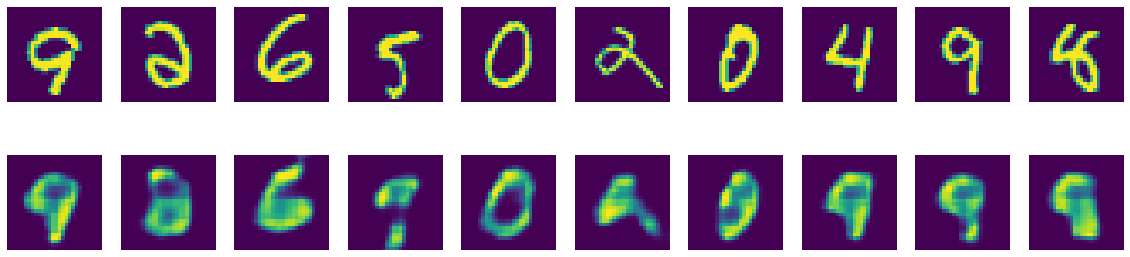

In [29]:
plt.figure(figsize=(20, 5))  #출력될 이미지의 크기를 정합니다.
for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 10, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 10, 10 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()